In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data source: https://catalog.data.gov/dataset/electric-vehicle-population-data/resource/ad90abe1-ef83-4a37-9d0c-a96ee3a798da?inner_span=True

In [2]:
data=pd.read_csv('C:/Users/yashg/Downloads/Electric_Vehicle_Population_Data.csv')

In [7]:
d_bev=data.groupby('Electric Vehicle Type').get_group('Battery Electric Vehicle (BEV)')
d_phev=data.groupby('Electric Vehicle Type').get_group('Plug-in Hybrid Electric Vehicle (PHEV)')

In [11]:
d_bev_range=d_bev['Electric Range']
d_bev_cost=d_bev['Base MSRP']
d_phev_range=d_phev['Electric Range']
d_phev_cost=d_phev['Base MSRP']

In [25]:
xx=np.where(d_bev_cost!=0)[0]
xx2=np.where(d_phev_cost!=0)[0]

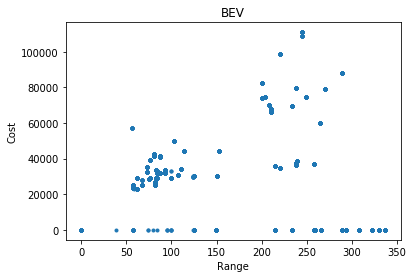

In [27]:
plt.plot(d_bev_range,d_bev_cost,'.')
plt.xlabel('Range')
plt.ylabel('Cost')
plt.title('BEV')
plt.show()

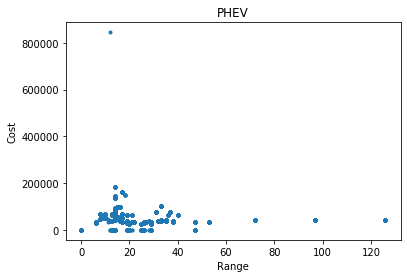

In [28]:
plt.plot(d_phev_range,d_phev_cost,'.')
plt.xlabel('Range')
plt.ylabel('Cost')
plt.title('PHEV')
plt.show()

In [30]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location'],
      dtype='object')

In [56]:
for p in data.columns:
    n=data[p].unique()
    print(p,len(n))
    if len(n)<10:
        print(p)
        print(n)

VIN (1-10) 3968
County 67
City 429
State 16
ZIP Code 538
Model Year 19
Make 29
Model 95
Electric Vehicle Type 2
Electric Vehicle Type
['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']
Clean Alternative Fuel Vehicle (CAFV) Eligibility 3
Clean Alternative Fuel Vehicle (CAFV) Eligibility
['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range'
 'Eligibility unknown as battery range has not been researched']
Electric Range 87
Base MSRP 147
Legislative District 50
DOL Vehicle ID 59255
Vehicle Location 536


In [40]:
data.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').size()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         47910
Eligibility unknown as battery range has not been researched     1067
Not eligible due to low battery range                           10278
dtype: int64

In [97]:
evs=data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible'].dropna()

In [108]:
ran=evs['Electric Range']
cost=evs['Base MSRP']
typ=evs['Electric Vehicle Type']
make=evs['Make']

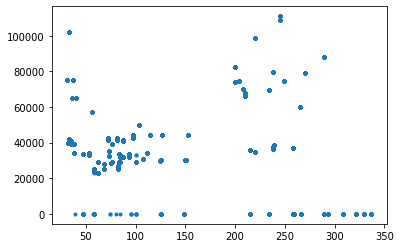

In [109]:
plt.plot(ran,cost,'.')

In [110]:
import tensorflow as tf

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [158]:
enc = OneHotEncoder(drop='first')
typ=np.reshape(np.array(typ),(len(typ),1))
make=np.reshape(np.array(make),(len(make),1))
ran=np.reshape(np.array(ran),(len(ran),1))
cost=np.reshape(np.array(cost),(len(cost),1))

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
typ_arr=enc.fit_transform(typ).toarray()
make_arr=enc.fit_transform(make).toarray()
ran_scal=scaler.fit_transform(ran)
cost_scal=scaler.fit_transform(cost)

In [163]:
X=np.column_stack([ran_scal,typ_arr,make_arr])
y=cost_scal

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [169]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,y_train)
coeff=reg.coef_
b=reg.intercept_
from sklearn.metrics import r2_score
ypred=reg.predict(X_test)
r2_score(y_test,ypred)

0.2807404882229865

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [180]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

0.9414514610981004

In [186]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [188]:
model = Sequential()
model.add(Dense(24, input_dim=24, kernel_initializer='normal', activation='relu'))
model.add(Dense(1336, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=150,  verbose=1, validation_split=0.2)

Train on 25665 samples, validate on 6417 samples
Epoch 1/30
25665/25665 [==============================] - 2s 71us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - mean_absolute_error: 0.1167 - val_loss: 0.0217 - val_mean_squared_error: 0.0217 - val_mean_absolute_error: 0.1015
Epoch 2/30
25665/25665 [==============================] - 1s 36us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - mean_absolute_error: 0.0962 - val_loss: 0.0190 - val_mean_squared_error: 0.0190 - val_mean_absolute_error: 0.0963
Epoch 3/30
25665/25665 [==============================] - 2s 63us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - mean_absolute_error: 0.0924 - val_loss: 0.0191 - val_mean_squared_error: 0.0191 - val_mean_absolute_error: 0.0922
Epoch 4/30
25665/25665 [==============================] - 1s 52us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - mean_absolute_error: 0.0914 - val_loss: 0.0187 - val_mean_squared_error: 0.0187 - val_mean_absolute_error: 0.0874
Epoch 5/30
25665/25

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


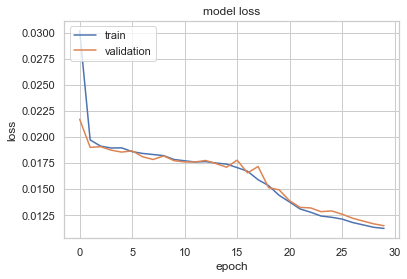

In [189]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [192]:
ypred=model.predict(X_test)

In [193]:
mean_absolute_error(y_test, ypred)

0.05109372751662555

In [194]:
mean_squared_error(y_test, ypred)

0.0112051271157094